## Setup Packages

In [1]:
%pip install scipy==1.11.4
%pip install dalex
%pip install scikit-plot
%pip install shap
%pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=9ae2658d4a4450ae63ff63380ebfdb2804a2815a661f0294843fef837164705b
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=02f65c06035f408d9636a6d98311150d9e1cf3bb7041917d390d0b6ffa120401
  Stored in dire

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import xgboost as xgb
import lightgbm as lgb

# import tree module
from sklearn import tree
# import dalex to explain complex model
import dalex as dx

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

## Load Dataset

In [3]:
df = pd.read_csv('startup data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df.shape

(923, 49)

### Data Understanding

- 'Unnamed:0' = possibly representing the index or a placeholder for missing data.
- 'state_code' = state code
- 'latitude' = north south position
- 'longitude' = east west position
- 'zip_code' = postal code
- 'id' = unique values
- 'city'= location
- 'Unnamed: 6' = Another unnamed column, likely a placeholder for missing data or unused information.
- 'name' = startup name
- 'labels' = Maybe same as status
- 'founded_at' = date founded
- 'closed_at' = date closed
- 'first_funding_at' = date first received it's funding
- 'last_funding_at' = The date of the most recent funding round.
- 'age_first_funding_year' = the age of the startup when it received first funding
- 'age_last_funding_year' = The age of the startup in years when it received its last funding.
- 'age_first_milestone_year' = The age of the startup when it achieved its first major milestone.
- 'age_last_milestone_year' = The age of the startup when it achieved its last major milestone.
- 'relationships' = The number of professional relationships or connections the startup has established.
- 'funding_rounds' = The total number of funding rounds the startup has gone through.
- 'funding_total_usd' = The total amount of funding the startup has raised
- 'milestones' = The total number of significant milestones the startup has achieved
- 'state_code.1' = secondary state code, potentially for validation or categorization purposes.
- 'is_CA', 'is_NY', is_MA', 'is_TX' = is it located in california, new york, massachusets or texas.
- 'is_otherstate' = is it located not in one of 4 locations above
- 'category_code' = The industry or category to which the startup belongs
- 'is_software' = in software industry
- 'is_web' = web industry
- 'is_mobile' = mobile industry
- 'is_enterprise' = enterprise industry
- 'is_advertising' = advertising industry
- 'is_gamesvideo' = games or video industry
- 'is_ecommerce' = e-commerce industry
- 'is_biotech' = biotech industry
- 'is_consulting' = consulting industry
- 'is_othercategory' = other than anything above
- 'object_id' =  A unique identifier for each object
- 'has_VC' = the startup has venture capital funding
- 'has_angel' = the startup has received angel funding
- 'has_roundA' = whether the startup has gone through a Series A funding round
- 'has_roundB' = whether the startup has gone through a Series B funding round
- 'has_roundC' = whether the startup has gone through a Series C funding round
- 'has_roundD' = whether the startup has gone through a Series D funding round
- 'avg_participants' = The average number of participants involved in the startup's funding rounds.
- 'is_top500' = is in the top 500 startups?
- 'status' = acquired or closed.

In [5]:
# Checking unique values
attFeatures = []
for i in df.columns:
    attFeatures.append([i,df[i].dtype, df[i].nunique(), df[i].sort_values().drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features','Type', 'Unique Number', 'Values'])

,Features,Type,Unique Number,Values
0,Unnamed: 0,int64,923,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15..."
1,state_code,object,35,"[AR, AZ, CA, CO, CT, DC, FL, GA, ID, IL, IN, K..."
2,latitude,float64,652,"[25.752358, 26.0524615, 26.106273, 27.951849, ..."
3,longitude,float64,651,"[-122.7569561, -122.725662, -122.674456, -122...."
4,zip_code,object,382,"[01752-4603, 01862-2000, 02111-1720, 10001, 10..."
5,id,object,922,"[c:10054, c:101312, c:10137, c:10153, c:10158,..."
6,city,object,221,"[Acton, Addison, Alameda, Albuquerque, Aliso V..."
7,Unnamed: 6,object,252,"[Acton MA 1720, Addison TX 75001, Alameda CA 9..."
8,name,object,922,"[#waywire, 1000memories, 41st Parameter, 5min ..."
9,labels,int64,2,"[0, 1]"


### Objectives

Business Question
- What Happened?

According to the BLS, **1/5 startups fail within their first year**. and **up to 65% of startups will fail within 10 years** of opening for businesses.
As a business consultant,

our client wants us to prevent his startup from going fail.
- why did it happen?

1. 38% of startup failures occur due to financial issues
2. 35% of businesses fail due to lack of market need
3. 20% of businesses fail due to industry competition
4. 19% of businesses fail due to unsuccessful business model
5. 18% of businesses fail due to legal challenges

source : https://www.forbes.com/advisor/business/software/startups-failure-rate/

- What will we do?

We're gonna eksplore fail startup dataset to make a predicition model of failing startup. Then giving insight what is the biggest cause of failing startup?

- How we do that?

We're going to use classification to consider is the startup will fail (0) or no. Then we use Feature Importance and SHAP to find the causes.

## Data Preprocessing

### Data Manipulation

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

,0
Unnamed: 0,int64
state_code,object
latitude,float64
longitude,float64
zip_code,object
id,object
city,object
Unnamed: 6,object
name,object
labels,int64


- We have to convert the datetype columns to the right type
- Map Status column to 1 and 0, change it to int

In [8]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

In [9]:
df['status'].astype(int)

,status
0,1
1,1
2,1
3,1
4,0
...,...
918,1
919,0
920,0
921,1


In [10]:
date_cols = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [11]:
# Checking is label exactly the same as status
for index, row in df.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

Okay it's the same, so we gonna drop it

In [12]:
# Drop Labels column
df.drop('labels', axis=1, inplace=True)

### Data Cleaning

In [13]:
# Handling Missing Values
df.isnull().sum() / len(df) * 100

,0
Unnamed: 0,0.000000
state_code,0.000000
latitude,0.000000
longitude,0.000000
zip_code,0.000000
id,0.000000
city,0.000000
Unnamed: 6,53.412784
name,0.000000
founded_at,0.000000


Handling Missing Values :     
1. drop unnamed 6 columns
2. drop closed_at column after add lifespan columns.
3. age_last_milestone_year and first_milestone because they don't have any milestone. If true, we gonna fill it with "0"
4. Drop state code columns later

In [14]:
# filter status acquired with closed_at notnull columns
df_status = df[(df['status'] == 'acquired') & (df['closed_at'].notnull())]
df_status

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status


In [15]:
# checking milestones 0 count
df[(df['milestones'] == 0)].shape

(152, 48)

In [16]:
# Since it's match with missing values in first and last milestones, so we gonna fillna with "no milestone"
df['age_first_milestone_year'].fillna(0, inplace=True)
df['age_last_milestone_year'].fillna(0, inplace=True)

In [17]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [18]:
# The distance between First funding at and founded at
df['get_first_funding'] = (pd.to_datetime(df['first_funding_at']) - pd.to_datetime(df['founded_at'])).dt.days
df['get_first_funding']

,get_first_funding
0,821
1,1871
2,377
3,1143
4,0
...,...
918,189
919,2647
920,3101
921,277


In [19]:
# Replace closed at in the index in df_status to Null
# df.loc[df_status.index, 'closed_at'] = None

In [20]:
# fill closed_at null values with "existing"
#df['closed_at'].fillna('existing', inplace=True)

No Duplicate, No Missing values, move up

### Feature Selection

We're gonna add and drop some columns :
- Add :
1. Lifespan (closed_at - founded_at)
3. Funding_year
- Drop : ['Unnamed: 6','state_code.1','zip_code','id','Unnamed: 0','object_id',
         'state_code', 'name', 'latitude', 'longitude', 'first_funding_at',
         'last_funding_at', 'founded_at', 'closed_at', 'category_code', 'city']

In [21]:
# Create new features Lifespan for EDA
df['lifespan'] = (pd.to_datetime(df['closed_at']) - pd.to_datetime(df['founded_at'])).dt.days
df['lifespan'] = pd.to_numeric(df['lifespan'], errors='coerce')
df['lifespan'] = df['lifespan'].fillna(0).astype(int)

In [22]:
df[df['lifespan'] < 0]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,get_first_funding,lifespan
73,245,CA,37.779026,-122.401840,94103,c:170,San Francisco,NaN,adBrite,2003-01-01,2001-02-01,2004-09-01,2012-05-01,1.6685,9.3370,7.3808,10.4740,17,4,40400000,3,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:170,0,0,1,1,1,1,1.6667,1,1,609,-699
88,491,CA,37.388869,-122.072353,94041,c:280611,Mountain View,Mountain View CA 94041,Yub,2013-01-01,2005-01-01,2013-11-19,2013-11-19,0.8822,0.8822,0.0000,0.0000,7,1,12000000,0,CA,1,0,0,0,0,ecommerce,0,0,0,0,0,0,1,0,0,0,c:280611,1,0,0,0,0,0,9.0000,1,0,322,-2922
558,372,NY,40.743662,-73.984268,10016,c:2245,New York,NaN,Advaliant,2013-04-16,2009-05-04,2004-04-01,2004-04-01,-9.0466,-9.0466,-6.0466,-3.8822,6,1,100000,2,NY,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:2245,0,1,0,0,0,0,1.0000,0,0,-3302,-1443


In [23]:
# drop Index 558, 73 and 88 coz they have minus in lifespan
df = df.drop([558, 88, 73])

In [24]:
# Drop Unnecessary Columns
df.drop(['Unnamed: 6','state_code.1','zip_code','id','Unnamed: 0','object_id',
         'state_code', 'name', 'latitude', 'longitude', 'first_funding_at',
         'last_funding_at', 'founded_at', 'closed_at', 'category_code', 'city'],axis = 1,inplace = True)

In [25]:
df['lifespan'].isnull().sum()

0

In [26]:
df['funding_age'] = df['age_last_funding_year'] - df['age_first_funding_year']

In [27]:
df[df['funding_age'] < 0]


,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,get_first_funding,lifespan,funding_age


In [28]:
df.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,get_first_funding,lifespan,funding_age
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,2.249981,3.943001,2.559068,3.977248,7.703261,2.311957,2.544557e+07,1.842391,0.527174,0.114130,0.090217,0.045652,0.221739,0.166304,0.156522,0.085870,0.079348,0.065217,0.056522,0.026087,0.036957,0.003261,0.323913,0.326087,0.254348,0.508696,0.392391,0.232609,0.098913,2.835161,0.809783,0.647826,821.243478,797.830435,1.693020
std,2.486336,2.934608,2.933034,3.411380,7.270911,1.390731,1.899406e+08,1.322833,0.499533,0.318143,0.286649,0.208843,0.415642,0.372556,0.363547,0.280324,0.270428,0.247043,0.231052,0.159481,0.188758,0.057042,0.468222,0.469035,0.435731,0.500196,0.488549,0.422725,0.298708,1.865236,0.392686,0.477908,907.512849,1367.313020,1.928033
min,-3.506800,-1.986300,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1280.000000,0.000000,0.000000
25%,0.578750,1.712300,0.000000,1.000000,3.000000,1.000000,2.737500e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000,211.250000,0.000000,0.000000
50%,1.449350,3.537000,2.001350,3.783600,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000,529.000000,0.000000,1.086350
75%,3.582175,5.559575,4.002700,6.036325,10.000000,3.000000,2.471250e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000,1307.500000,1308.000000,2.794525
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,7992.000000,10368.000000,10.819200


There is some suspicious data, age first and last funding is minus. let's drop it

In [29]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

## Data Splitting

In [30]:
# Feature and Target Split
X = df.drop(["status"], axis=1)
y = df["status"]

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, stratify = y, random_state= 42)

## EDA

In [31]:
# numerik columns :
columns = ['avg_participants', 'age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'lifespan', 'funding_age']

pd.DataFrame(X_train[columns].describe()).T

,count,mean,std,min,25%,50%,75%,max
avg_participants,670.0,2.857908e+00,1.941940e+00,1.0,1.500000e+00,2.366650e+00,3.766675e+00,1.600000e+01
age_first_funding_year,670.0,2.367829e+00,2.484748e+00,0.0,6.725750e-01,1.553400e+00,3.687700e+00,2.189590e+01
age_last_funding_year,670.0,4.097533e+00,2.961859e+00,0.0,1.871900e+00,3.664400e+00,5.685600e+00,2.189590e+01
relationships,670.0,7.759701e+00,7.341785e+00,0.0,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,670.0,2.313433e+00,1.348297e+00,1.0,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
funding_total_usd,670.0,2.908456e+07,2.220205e+08,11000.0,3.000000e+06,1.000000e+07,2.585332e+07,5.700000e+09
milestones,670.0,1.823881e+00,1.319746e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
lifespan,670.0,7.823433e+02,1.388764e+03,0.0,0.000000e+00,0.000000e+00,1.266500e+03,1.036800e+04
funding_age,670.0,1.729704e+00,1.952477e+00,0.0,0.000000e+00,1.108200e+00,2.829425e+00,1.081920e+01


### Gain Insight from Total Funding, is it affect startups success




In [32]:
# merging X_train and y_train for EDA
X_train['status'] = y_train

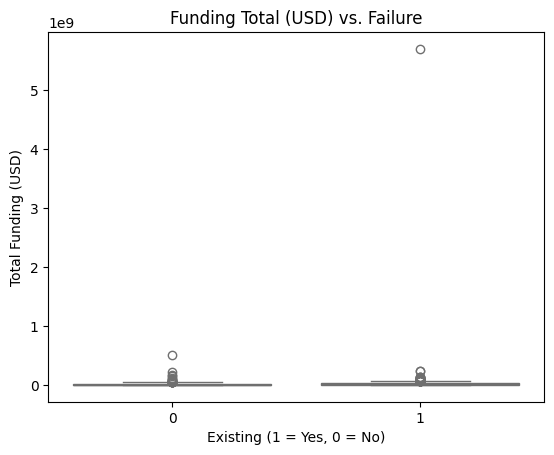

        count          mean           std      min        25%         50%  \
status                                                                      
0       229.0  1.723771e+07  4.210487e+07  11000.0  1000000.0   5000000.0   
1       441.0  3.523633e+07  2.718792e+08  70000.0  4700000.0  13000000.0   

               75%           max  
status                            
0       19000000.0  5.100000e+08  
1       27690547.0  5.700000e+09  


In [33]:
# Compare funding total USD for failed and non-failed startups
sns.boxplot(data=X_train, x='status', y='funding_total_usd', color='skyblue')
plt.title('Funding Total (USD) vs. Failure')
plt.xlabel('Existing (1 = Yes, 0 = No)')
plt.ylabel('Total Funding (USD)')
plt.show()

# Statistical summary
print(X_train.groupby('status')['funding_total_usd'].describe())

In [34]:
X_train.groupby('status')['funding_total_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,229.0,1.723771e+07,4.210487e+07,11000.0,1000000.0,5000000.0,19000000.0,5.100000e+08
1,441.0,3.523633e+07,2.718792e+08,70000.0,4700000.0,13000000.0,27690547.0,5.700000e+09


In [35]:
# Startup which get more that 200 mil dollars funding
X_train[X_train['funding_total_usd'] > 200000000]

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,get_first_funding,lifespan,funding_age,status
82,3.5123,3.9562,3.9534,4.8356,5,2,510000000,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2.5000,1,1282,2131,0.4439,0
364,4.6000,9.4164,5.2575,9.7753,19,4,5700000000,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.2500,1,1679,0,4.8164,1
497,3.6384,11.9041,10.9836,12.6822,29,7,238209999,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0000,1,1328,0,8.2657,1
694,0.3288,6.4192,1.1671,4.9890,6,8,211403000,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,2.7143,1,120,2618,6.0904,0
728,2.5041,7.2521,0.0000,0.0000,4,6,232000100,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,3.6667,1,914,0,4.7480,1


Looks like it has more zero than it should be

In [36]:
# replace funding total in row 364
X_train.loc[364, 'funding_total_usd'] = 570000000

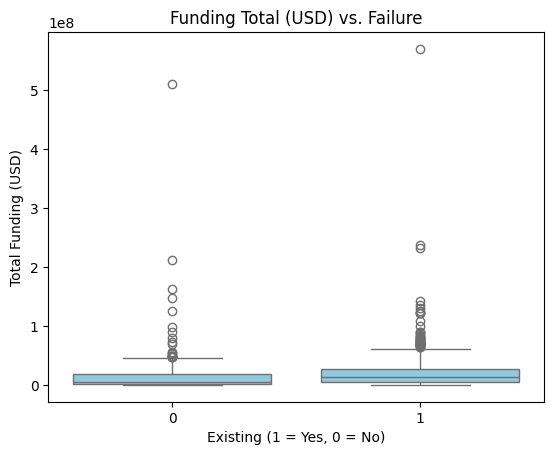

        count          mean           std      min        25%         50%  \
status                                                                      
0       229.0  1.723771e+07  4.210487e+07  11000.0  1000000.0   5000000.0   
1       441.0  2.360368e+07  3.875340e+07  70000.0  4700000.0  13000000.0   

               75%          max  
status                           
0       19000000.0  510000000.0  
1       27690547.0  570000000.0  


In [37]:
# Compare funding total USD for failed and non-failed startups
sns.boxplot(data=X_train, x='status', y='funding_total_usd', color='skyblue')
plt.title('Funding Total (USD) vs. Failure')
plt.xlabel('Existing (1 = Yes, 0 = No)')
plt.ylabel('Total Funding (USD)')
plt.show()

# Statistical summary
print(X_train.groupby('status')['funding_total_usd'].describe())

1. The median funding for existing startups is higher than failed startups, This suggests that startups with higher funding tend to survive more often.
2. The existing have wider range of funding total, it means some successfull startup gain more funding that most failed startups.
3. Existing have more extreme funding outliers. The farthest outlier for fail startup just reach the beginning of existing outliers.

**So we can conclude that funding have so much impact to the success startup.**

### Analyzing fail startups lifespan

In [38]:
# selecting 0 in status column
fail_startup = X_train[X_train['status'] == 0]

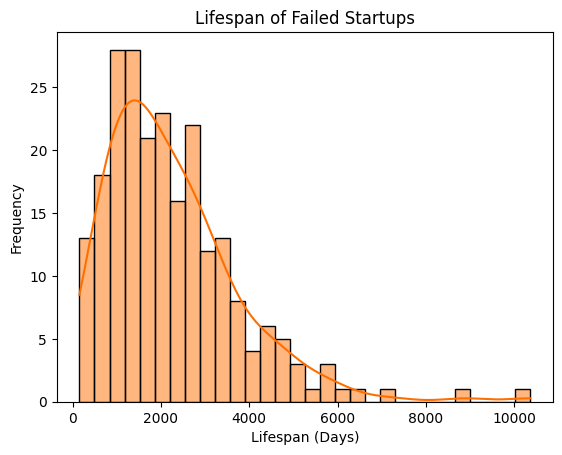

In [39]:
# Calculate lifespan for startups

failed_lifespan = fail_startup[fail_startup['status'] == 0]['lifespan']
sns.histplot(failed_lifespan, bins=30, kde=True, color = '#ff6f00')
plt.title('Lifespan of Failed Startups')
plt.xlabel('Lifespan (Days)')
plt.ylabel('Frequency')
plt.show()

The data is positively skewed, with a peak at around **1000–2000 days (about 3–5.5 years)**.
The frequency gradually decreases as the lifespan increases, indicating that fewer startups survive longer before failing.

The question is :
- is 20% fail in the first year?
- is 65% fail in 10 years?

In [40]:
# count the percentage if lifespan under 365 days
oneyear = fail_startup[fail_startup['lifespan'] < 365].shape[0] / fail_startup.shape[0] * 100

# the year when percentage touch 20%
threeyears = fail_startup[fail_startup['lifespan'] < 1000].shape[0] / fail_startup.shape[0] * 100

# count the percentage if lifespan under 3650 days/ 10 years
tenyears = fail_startup[fail_startup['lifespan'] < 3650].shape[0] / fail_startup.shape[0] * 100

# the year when percentage touch 65%
fiveyears = fail_startup[fail_startup['lifespan'] < 2390].shape[0] / fail_startup.shape[0] * 100

print(f'{oneyear:.2f}% startups fail in the first year')
print(f'{threeyears:.2f}% startups fail in 3 years')
print(f'{tenyears:.2f}% startups fail in 10 years')
print(f'{fiveyears:.2f}% startups fail in 6,5 years')

# Average lifespan
print(f"Average lifespan of failed startups: {failed_lifespan.mean()/365:.2f} years")

1.75% startups fail in the first year
18.34% startups fail in 3 years
84.72% startups fail in 10 years
61.57% startups fail in 6,5 years
Average lifespan of failed startups: 6.15 years


We have different findings. Surprisingly only 1,6% startup that closed in their first year and reach 20% in 3 years.

But they reach 65% just in 6,5 years. And 86% startups fail in 10 years. We have a raise here and it makes the age of startup shorter.

### Is category affect failure?

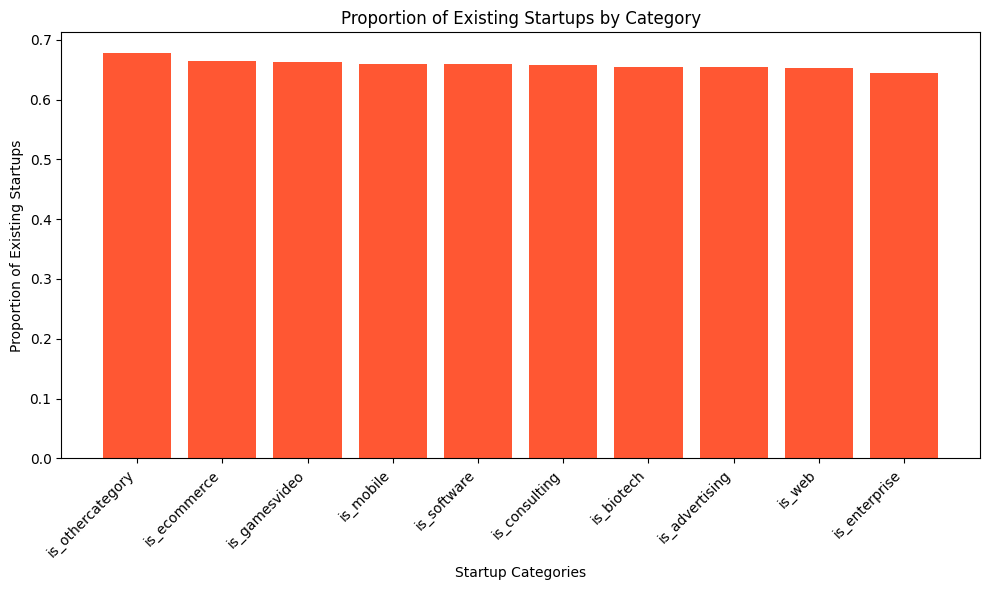

In [41]:
# List of categories
categories = [
    'is_software', 'is_web', 'is_mobile', 'is_enterprise',
    'is_advertising', 'is_gamesvideo', 'is_ecommerce',
    'is_biotech', 'is_consulting', 'is_othercategory'
]

# Calculate the proportion of existing startups for each category
existing_proportions = {category: X_train[X_train[category] == 0]['status'].mean() for category in categories}

# Convert to a DataFrame for plotting
proportions_df = pd.DataFrame(list(existing_proportions.items()), columns=['Category', 'Proportion'])
proportions_df = proportions_df.sort_values(by='Proportion', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(proportions_df['Category'], proportions_df['Proportion'], color='#FF5733')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of Existing Startups')
plt.xlabel('Startup Categories')
plt.title('Proportion of Existing Startups by Category')
plt.tight_layout()
plt.show()

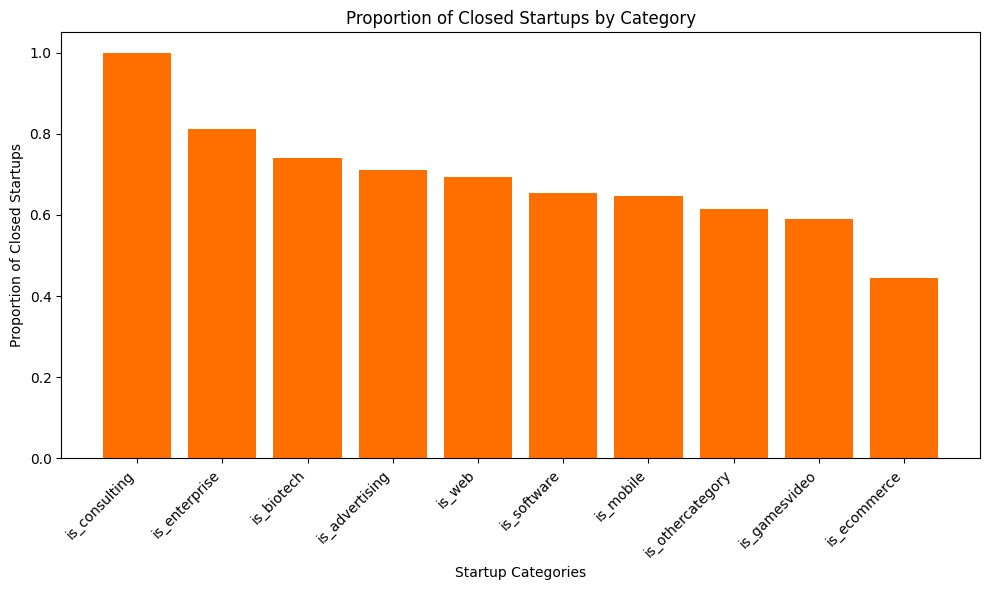

In [42]:
# Calculate the proportion of closed startups for each category
closed_proportions = {category: X_train[X_train[category] == 1]['status'].mean() for category in categories}

# Convert to a DataFrame for plotting
proportions_df = pd.DataFrame(list(closed_proportions.items()), columns=['Category', 'Proportion'])
proportions_df = proportions_df.sort_values(by='Proportion', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(proportions_df['Category'], proportions_df['Proportion'], color='#ff6f00')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of Closed Startups')
plt.xlabel('Startup Categories')
plt.title('Proportion of Closed Startups by Category')
plt.tight_layout()
plt.show()

We found new information :
1. e_commerce have lowest proportion of closing.
2. the enterprise sector is vulnerable to closing, then advertising and mobile sector. Maybe the must to fight with uniqueness rather than just doing marketing.

### Is Relationship matters?

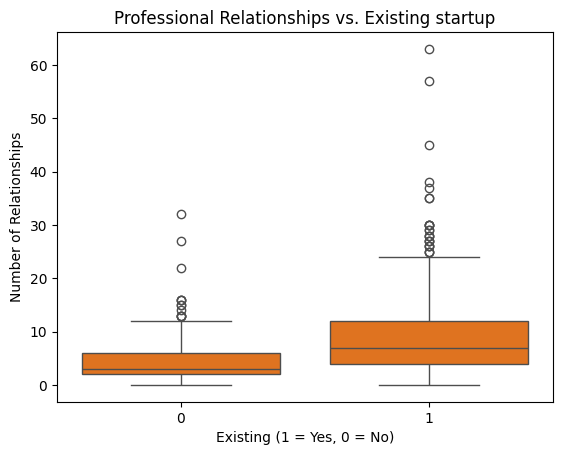

        count      mean       std  min  25%  50%   75%   max
status                                                      
0       229.0  4.270742  4.396577  0.0  2.0  3.0   6.0  32.0
1       441.0  9.571429  7.893899  0.0  4.0  7.0  12.0  63.0


In [43]:
sns.boxplot(data=X_train, x='status', y='relationships', color = '#ff6f00')
plt.title('Professional Relationships vs. Existing startup')
plt.xlabel('Existing (1 = Yes, 0 = No)')
plt.ylabel('Number of Relationships')
plt.show()

# Statistical summary
print(X_train.groupby('status')['relationships'].describe())


Same as funding, we found that startup that have more relations tend to survive highly. If a startups have more than 20 Professional Relationship, they will strongly survive! Only 3 startups fail when they have 20+ relations.

### Milestones vs Existing Startups

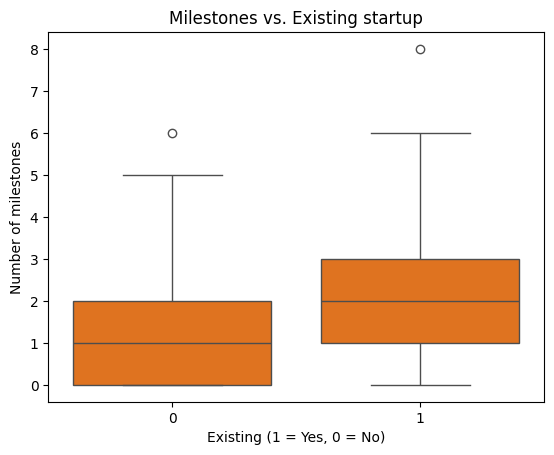

        count      mean       std  min  25%  50%  75%  max
status                                                    
0       229.0  1.305677  1.211427  0.0  0.0  1.0  2.0  6.0
1       441.0  2.092971  1.294383  0.0  1.0  2.0  3.0  8.0


In [44]:
sns.boxplot(data=X_train, x='status', y='milestones', color = '#ff6f00')
plt.title('Milestones vs. Existing startup')
plt.xlabel('Existing (1 = Yes, 0 = No)')
plt.ylabel('Number of milestones')
plt.show()

# Statistical summary
print(X_train.groupby('status')['milestones'].describe())

### Is Relation affect Funding?

Text(0.5, 1.0, 'Relationship vs. Funding Total (USD)')

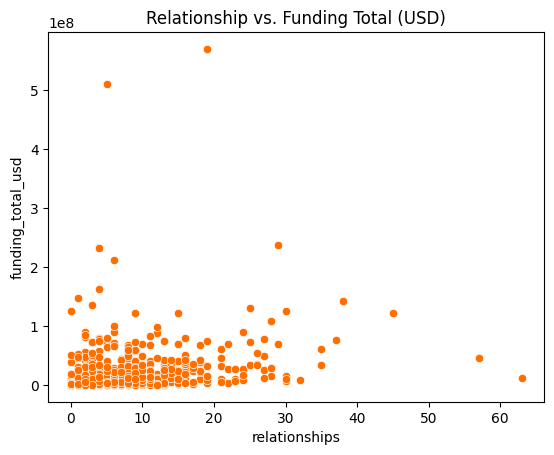

In [45]:
# Correlation between relations and total funding
sns.scatterplot(data=X_train, x='relationships', y='funding_total_usd', color = '#ff6f00')
plt.title('Relationship vs. Funding Total (USD)')

### Funding source analysis

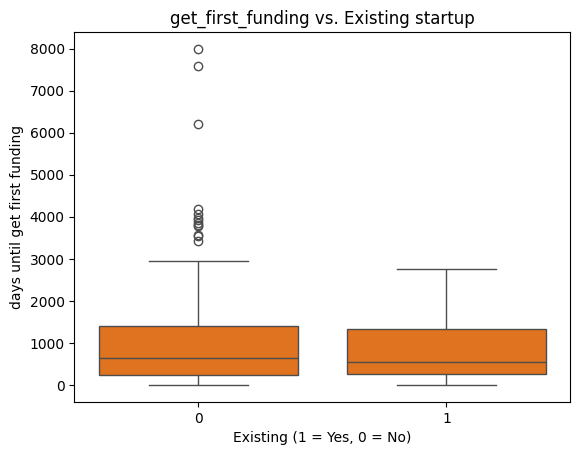

        count        mean          std  min    25%    50%     75%     max
status                                                                   
0       229.0  994.026201  1194.422260  0.0  244.0  638.0  1391.0  7992.0
1       441.0  796.873016   705.718645  0.0  248.0  549.0  1326.0  2749.0


In [46]:
sns.boxplot(data=X_train, x='status', y='get_first_funding', color = '#ff6f00')
plt.title('get_first_funding vs. Existing startup')
plt.xlabel('Existing (1 = Yes, 0 = No)')
plt.ylabel('days until get first funding')
plt.show()

# Statistical summary
print(X_train.groupby('status')['get_first_funding'].describe())


In [47]:
X_train.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'get_first_funding', 'lifespan',
       'funding_age', 'status'],
      dtype='object')

In [48]:
# Comparing status with funding_round, has_roundA, has_roundB, has_roundC, has_roundD
funding = X_train.groupby('status')[['funding_rounds', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'has_VC', 'has_angel']].mean()
funding['funding_rounds_pct'] = funding['funding_rounds'] / funding['funding_rounds'].sum() * 100
funding['roundA_pct'] = funding['has_roundA'] / funding['has_roundA'].sum() * 100
funding['roundB_pct'] = funding['has_roundB'] / funding['has_roundB'].sum() * 100
funding['roundC_pct'] = funding['has_roundC'] / funding['has_roundC'].sum() * 100
funding['roundD_pct'] = funding['has_roundD'] / funding['has_roundD'].sum() * 100
funding['VC_pct'] = funding['has_VC'] / funding['has_VC'].sum() * 100
funding['angel_pct'] = funding['has_angel'] / funding['has_angel'].sum() * 100
funding.drop(['funding_rounds', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'has_VC', 'has_angel'], axis=1, inplace=True)

funding

,funding_rounds_pct,roundA_pct,roundB_pct,roundC_pct,roundD_pct,VC_pct,angel_pct
status,,,,,,,
0,43.678916,40.304506,36.398056,34.43519,23.994777,55.297018,55.72126
1,56.321084,59.695494,63.601944,65.56481,76.005223,44.702982,44.27874


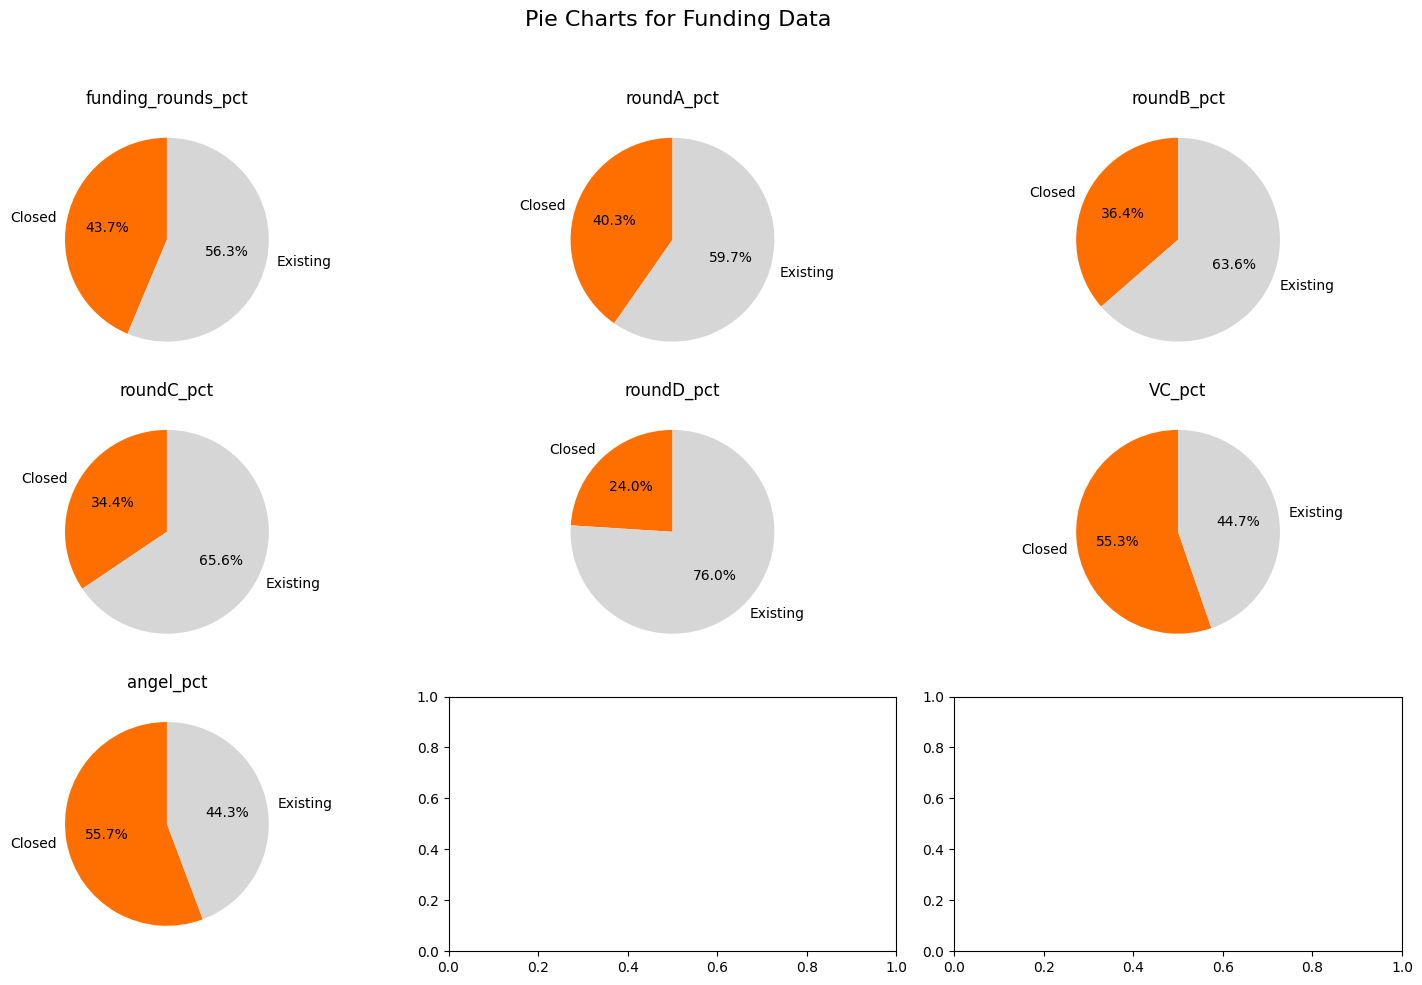

In [49]:
labels = ["Closed", "Existing"]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

columns = funding.columns

for i, column in enumerate(columns):
    axes[i].pie(
        funding[column],
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff6f00', '#d6d6d6']
    )
    axes[i].set_title(column)


fig.suptitle('Pie Charts for Funding Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the chart above we can said that :
- In every funding stage, existing startups gain more funding.
- The complex stage funding is, the lower closed startup get. only 30% in round D

1. Seed = before or just after launch.
has_angel from personal and VC from venture capital/ owners.
2. Round A = usually for promotion and marketing
3. Round B = more market coverage and opening more stores
4. Round C = Large Expansions
5. Round D = Prototype of new product, research and improvement.

- **Surprisingly, at the beginning of the stage/ seed_funding, the closed startups gain more funding.**

In [50]:
# drop status from X_train
X_train.drop('status', axis=1, inplace=True)

In [51]:
# Drop lifespan column
X_train.drop('lifespan', axis=1, inplace=True)
X_test.drop('lifespan', axis=1, inplace=True)

## Feature Engineering

### Encoding

It's alredy encoded

In [52]:
X_train.shape

(670, 33)

In [53]:
y_train.shape

(670,)

### Handling Outliers

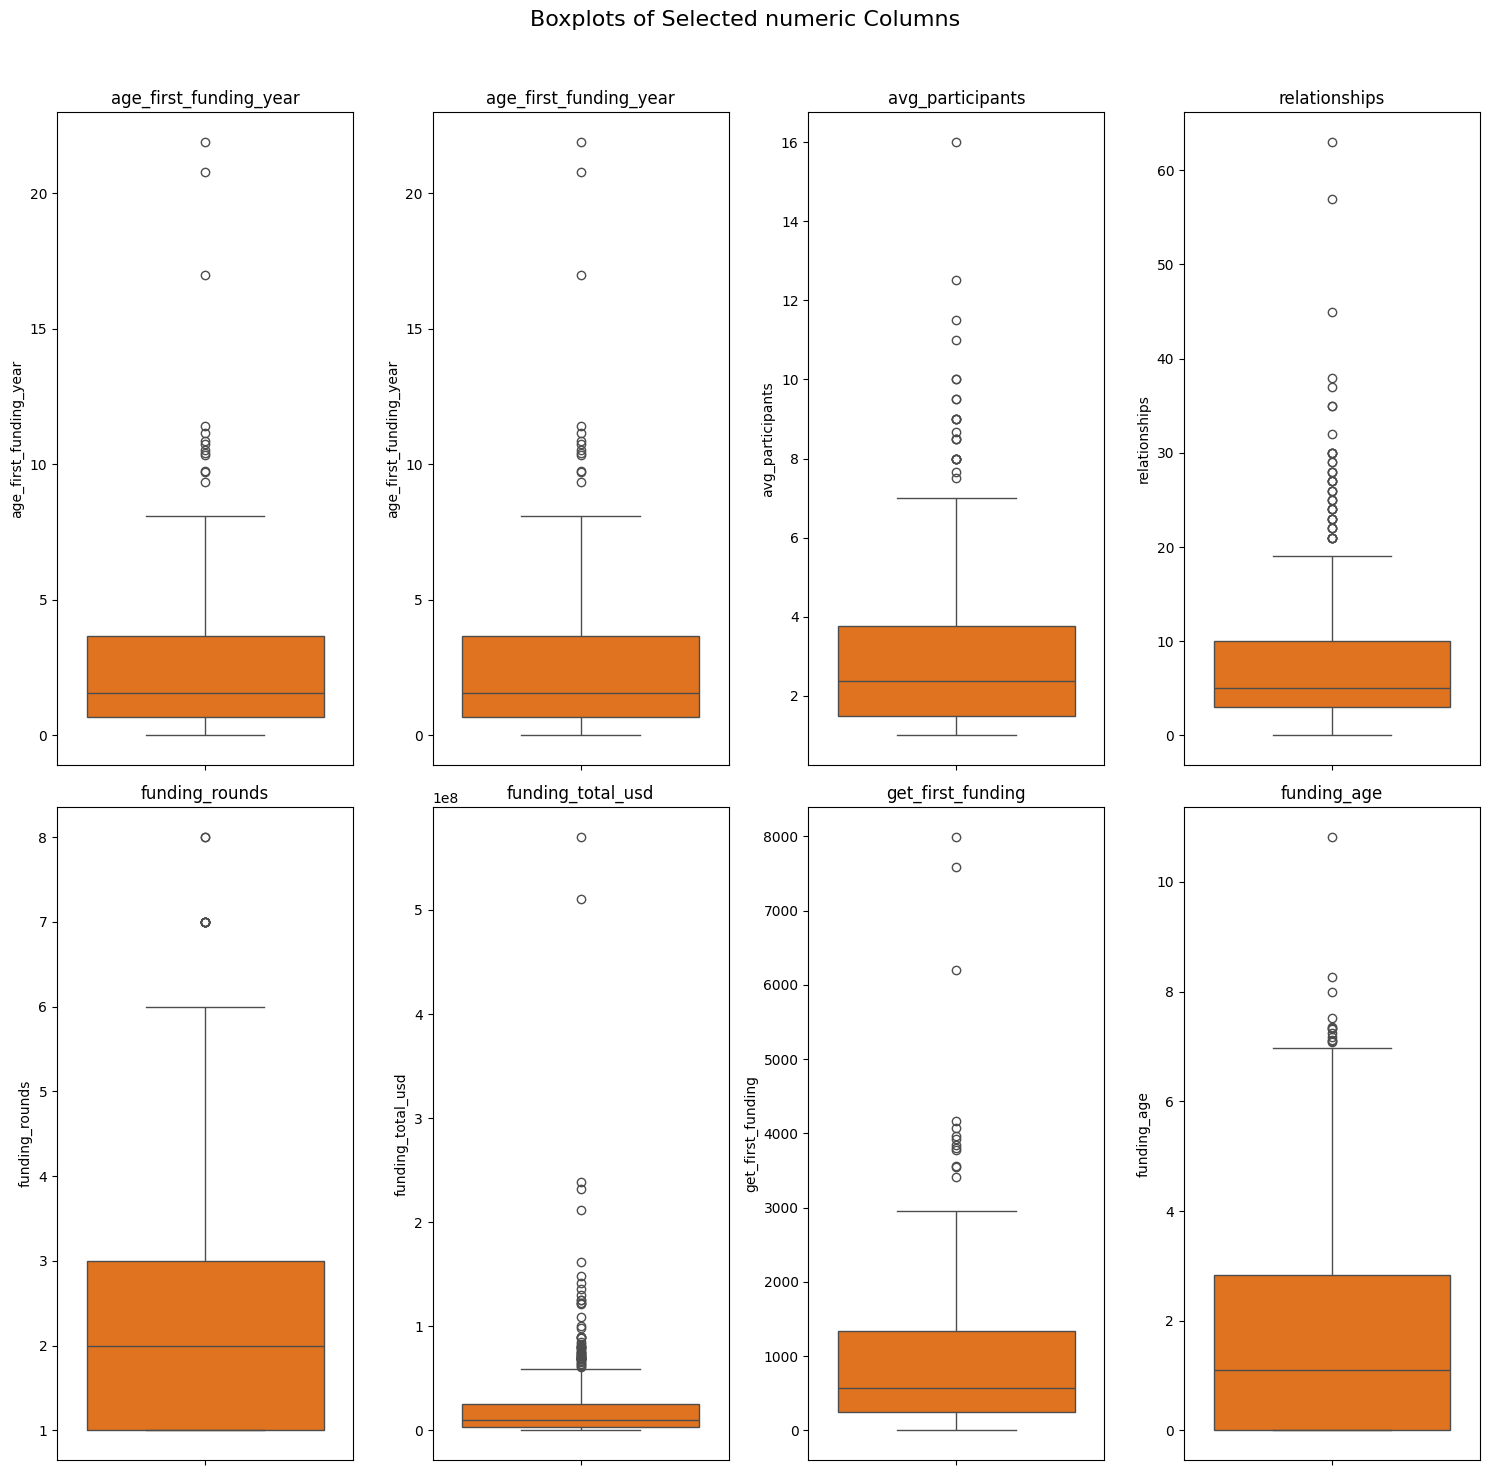

In [54]:
columns = ['age_first_funding_year', 'age_first_funding_year','avg_participants', 'relationships', 'funding_rounds', 'funding_total_usd', 'get_first_funding', 'funding_age']

# Checking Outliers in every numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle("Boxplots of Selected numeric Columns", fontsize=16)

# Loop through the columns and plot each one as a boxplot
for i, col in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=X_train[col], color = '#ff6f00')
    plt.title(col)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [55]:
'''for col in columns:
    X_train[col] = np.log1p(X_train[col])'''

'for col in columns:\n    X_train[col] = np.log1p(X_train[col])'

better

### Multicollinearity Check

In [56]:
df_temp = pd.concat([X_train, y_train], axis=1)
df_temp.dtypes

,0
age_first_funding_year,float64
age_last_funding_year,float64
age_first_milestone_year,float64
age_last_milestone_year,float64
relationships,int64
funding_rounds,int64
funding_total_usd,int64
milestones,int64
is_CA,int64
is_NY,int64


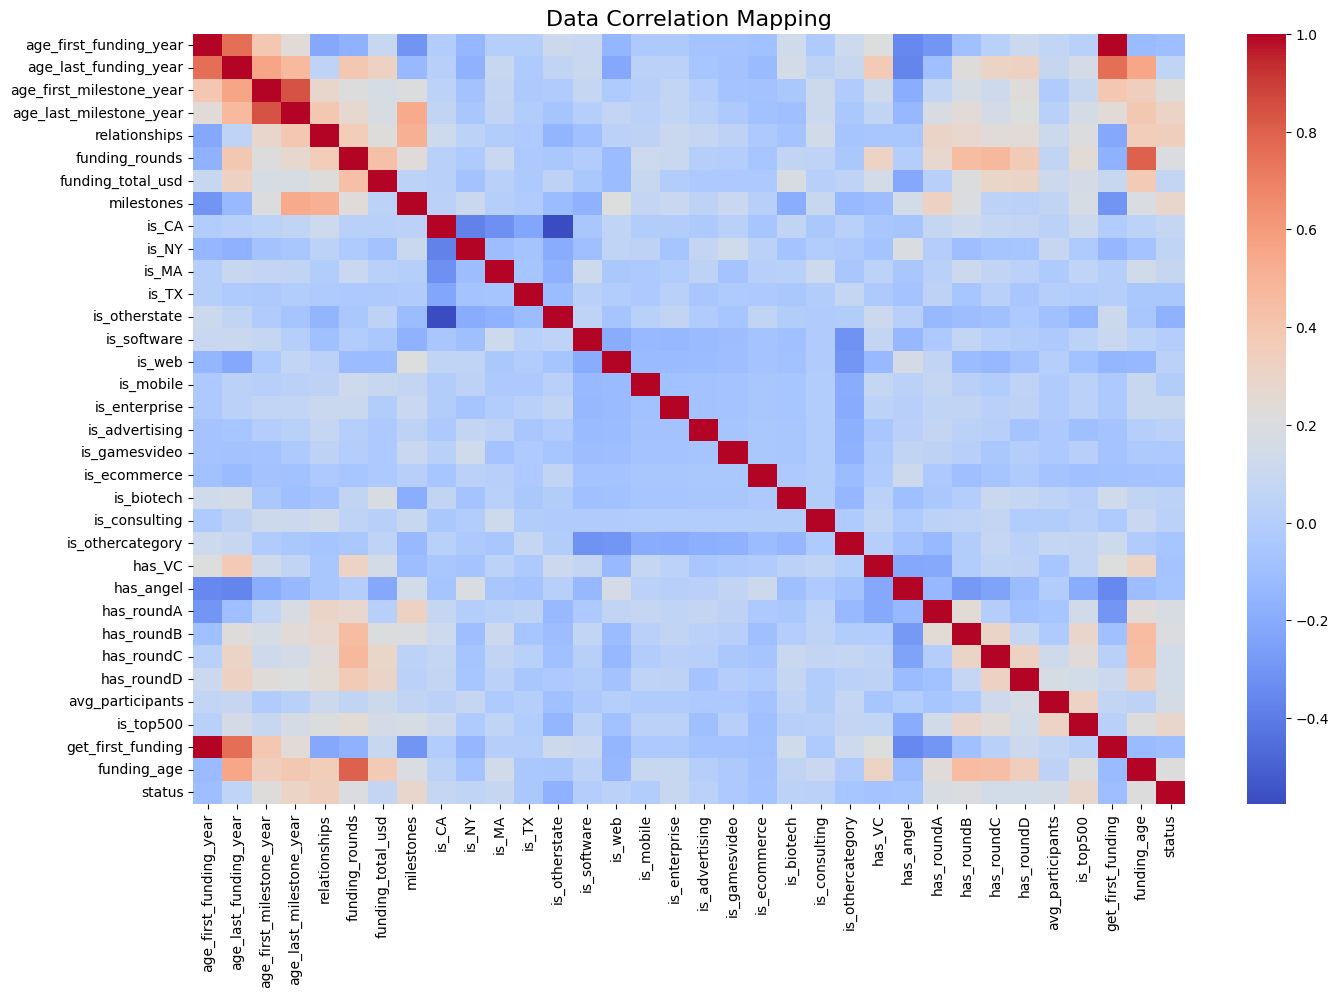

In [57]:
#Heatmap
df_temp = pd.concat([X_train, y_train], axis=1)
corr_= df_temp.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, cmap = "coolwarm")

plt.title("Data Correlation Mapping", fontsize = 16)
plt.show()

We found some strong correlation
- Lifespan and status
- age first and last milestones
- age first and last funding

### Scaling

In [58]:
X_train.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,get_first_funding,funding_age
351,0.1616,2.1781,1.5096,2.1781,3,4,3350000,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1.5,0,59,2.0165
285,0.9178,2.7288,2.4164,2.7288,8,3,10500000,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,2.0,1,335,1.8110
747,7.4027,7.4027,7.4000,11.8740,15,1,8800000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5.0,1,2702,0.0000
773,5.1452,5.1452,2.0000,2.0000,4,1,2000000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,1,1878,0.0000
901,3.1342,5.2521,3.1342,3.5425,6,2,6760000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.5,1,1144,2.1179


In [59]:
#Initialize the scaler (use StandardScaler for standardization or MinMaxScaler for normalization)
scaler = StandardScaler()

# Fit the scaler on the training set and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train.shape

(670, 33)

## Modeling

In [61]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 42,
    n_estimators = 100
)
# fit model to training data
random_forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# define XGB model
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

In [63]:
# define LGBM model
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

lgbm = LGBMClassifier(random_state=42)

lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 441, number of negative: 229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1687
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.658209 -> initscore=0.655323
[LightGBM] [Info] Start training from score 0.655323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [64]:
# random forest prediction
rf_train_pred = random_forest_clf.predict(X_train_scaled)
rf_pred = random_forest_clf.predict(X_test_scaled)
rf_pred_proba = random_forest_clf.predict_proba(X_test_scaled)

# XGBoost prediction
xgb_train_pred = xgb_clf.predict(X_train_scaled)
xgb_pred = xgb_clf.predict(X_test_scaled)
xgb_pred_proba = xgb_clf.predict_proba(X_test_scaled)

# LGBM prediction
lgbm_train_pred = lgbm.predict(X_train_scaled)
lgbm_pred = lgbm.predict(X_test_scaled)
lgbm_pred_proba = lgbm.predict_proba(X_test_scaled)

In [65]:
# random forest prediction result
report = classification_report(y_train, rf_train_pred, target_names=['0', '1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,229.0,441.0,1.0,670.0,670.0


In [66]:
# random forest prediction result
report = classification_report(y_test, rf_pred, target_names=['0', '1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.860465,0.832000,0.839286,0.846233,0.841827
recall,0.637931,0.945455,0.839286,0.791693,0.839286
f1-score,0.732673,0.885106,0.839286,0.808890,0.832481
support,58.000000,110.000000,0.839286,168.000000,168.000000


Confusion Matrix:
 [[ 37  21]
 [  6 104]]


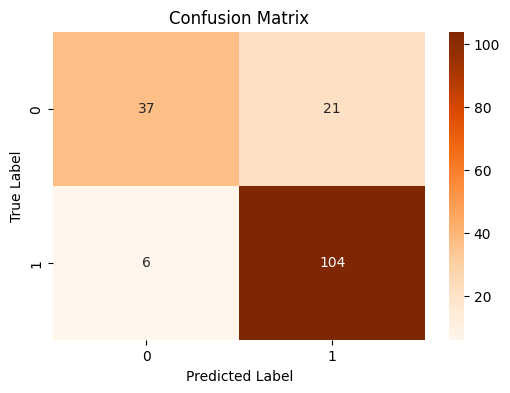

In [67]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [68]:
# XGBoost prediction result
report = classification_report(y_train, xgb_train_pred, target_names=['0','1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,229.0,441.0,1.0,670.0,670.0


In [69]:
# XGBoost prediction result
report = classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.754717,0.843478,0.815476,0.799098,0.812834
recall,0.689655,0.881818,0.815476,0.785737,0.815476
f1-score,0.720721,0.862222,0.815476,0.791471,0.813371
support,58.000000,110.000000,0.815476,168.000000,168.000000


Confusion Matrix:
 [[40 18]
 [13 97]]


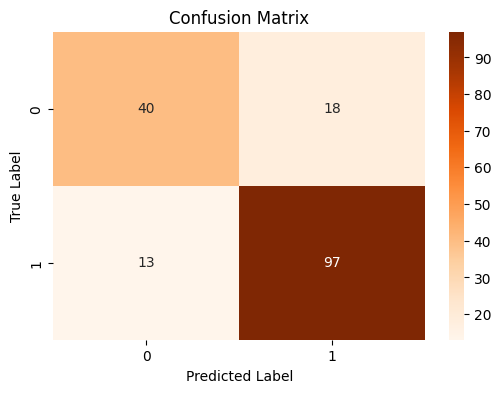

In [70]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [71]:
# LGBM prediction result
report = classification_report(y_train, lgbm_train_pred, target_names=['0','1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,229.0,441.0,1.0,670.0,670.0


In [72]:
# LGBM prediction result
report = classification_report(y_test, lgbm_pred, target_names=['0','1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.796296,0.868421,0.845238,0.832359,0.843521
recall,0.741379,0.900000,0.845238,0.820690,0.845238
f1-score,0.767857,0.883929,0.845238,0.825893,0.843856
support,58.000000,110.000000,0.845238,168.000000,168.000000


Confusion Matrix:
 [[43 15]
 [11 99]]


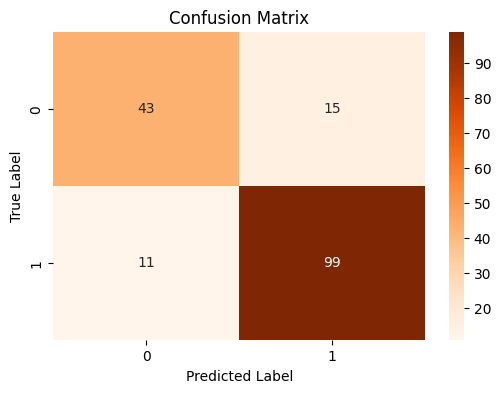

In [73]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, lgbm_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## SMOTE

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [75]:
# define baseline model
lgbm_scaled = LGBMClassifier(random_state=42)

lgbm_scaled.fit(X_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 441, number of negative: 441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1860
[LightGBM] [Info] Number of data points in the train set: 882, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [76]:
# LGBM prediction
lgbm_train_pred = lgbm_scaled.predict(X_train)
# LGBM prediction result
report = classification_report(y_train, lgbm_train_pred, target_names=['0', '1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,229.0,441.0,1.0,670.0,670.0


In [77]:
# LGBM Test prediction
lgbm_scaled_pred = lgbm_scaled.predict(X_test)
# LGBM prediction result
report = classification_report(y_test, lgbm_scaled_pred, target_names=['0', '1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.789474,0.882883,0.85119,0.836178,0.850634
recall,0.775862,0.890909,0.85119,0.833386,0.851190
f1-score,0.782609,0.886878,0.85119,0.834743,0.850880
support,58.000000,110.000000,0.85119,168.000000,168.000000


Confusion Matrix:
 [[45 13]
 [12 98]]


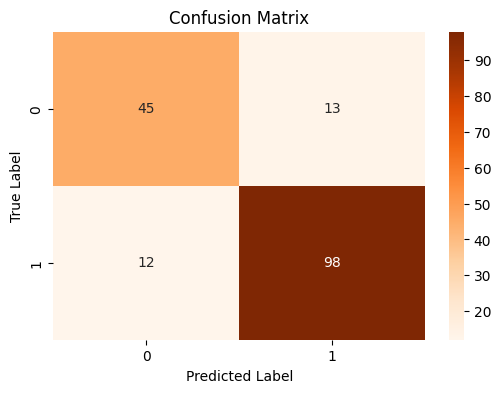

In [78]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, lgbm_scaled_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Better, so we gonna use balanced data

## Hyperparameter Tuning

In [79]:
# define baseline model
lgbm_scaled = LGBMClassifier(random_state=42, max_depth=5, learning_rate=0.1, num_leaves=31,
                             min_data_in_leaf=20)

lgbm_scaled.fit(X_resampled, y_resampled)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 441, number of negative: 441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1860
[LightGBM] [Info] Number of data points in the train set: 882, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

LGBMClassifier(max_depth=5, min_data_in_leaf=20, random_state=42)

In [80]:
# LGBM prediction
lgbm_train_pred = lgbm_scaled.predict(X_train)
# LGBM prediction result
report = classification_report(y_train, lgbm_train_pred, target_names=['0', '1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


,0,1,accuracy,macro avg,weighted avg
precision,0.990698,0.964835,0.973134,0.977766,0.973675
recall,0.930131,0.995465,0.973134,0.962798,0.973134
f1-score,0.959459,0.979911,0.973134,0.969685,0.972921
support,229.000000,441.000000,0.973134,670.000000,670.000000


In [81]:
# LGBM Test prediction
lgbm_scaled_pred = lgbm_scaled.predict(X_test)
# LGBM prediction result
report = classification_report(y_test, lgbm_scaled_pred, target_names=['0', '1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


,0,1,accuracy,macro avg,weighted avg
precision,0.793103,0.890909,0.857143,0.842006,0.857143
recall,0.793103,0.890909,0.857143,0.842006,0.857143
f1-score,0.793103,0.890909,0.857143,0.842006,0.857143
support,58.000000,110.000000,0.857143,168.000000,168.000000


Confusion Matrix:
 [[46 12]
 [12 98]]


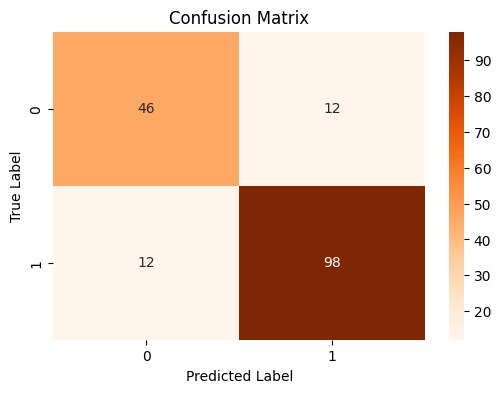

In [82]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, lgbm_scaled_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [89]:
from sklearn.metrics import f1_score, make_scorer

# Grid hyperparameter
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'min_data_in_leaf': [5, 10, 20, 30, 40],
    'num_leaves': [7, 31, 127, 511],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 1.0],
    'max_depth': [3, 5, 7, 9],
}

# Scorer untuk F1-Score
f1_scorer = make_scorer(f1_score, average='weighted')

# GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,
    scoring= f1_scorer,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_resampled, y_resampled)


print(f"Best Parameters for LGBM: {grid_search.best_params_}")
print(f"Best Score for LGBM: {grid_search.best_score_}")


Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 441, number of negative: 441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1862
[LightGBM] [Info] Number of data points in the train set: 882, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters for LGBM: {'learning_rate': 0.3, 'max_depth': 5, 'min_data_in_leaf': 10, 'n_estimators': 100, 'num_leaves': 7}
Best Score for LGBM: 0.8119808282813473


In [84]:
# Model terbaik dari hasil tuning
best_model = grid_search.best_estimator_

# Evaluasi pada data uji
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='weighted')
print("Test F1-Score:", test_f1)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Test F1-Score: 0.8262506637640572


In [87]:
y_train_pred = best_model.predict(X_resampled)
train_f1 = f1_score(y_resampled, y_train_pred, average='weighted')
print("Train F1-Score:", train_f1)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Train F1-Score: 1.0


In [85]:
# random forest prediction result
report = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
report_df = pd.DataFrame(report)
report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.763636,0.858407,0.827381,0.811022,0.825689
recall,0.724138,0.881818,0.827381,0.802978,0.827381
f1-score,0.743363,0.869955,0.827381,0.806659,0.826251
support,58.000000,110.000000,0.827381,168.000000,168.000000


Confusion Matrix:
 [[42 16]
 [13 97]]


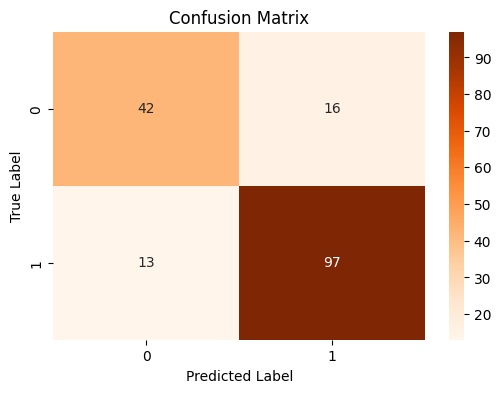

In [86]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## explanatory model analysis

In [ ]:
## initiate explainer for best model
lgbm_exp = dx.Explainer(lgbm_scaled, X_resampled, y_resampled, label = "Model Interpretation")

Preparation of a new explainer is initiated

  -> data              : 882 rows 33 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 882 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : Model Interpretation
  -> predict function  : <function yhat_proba_default at 0x7e5d2a717640> will be used (default)
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
  -> predicted values  : min = 0.000403, mean = 0.5, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 wi

### Feature Importance

In [ ]:
# visualize permutation feature importance for best model
lgbm_exp.model_parts().plot()

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

### Partial Dependent Plot

In [ ]:
# create partial dependence plot of RF model
lgbm_exp.model_profile().plot()

Calculating ceteris paribus:   6%|▌         | 2/33 [00:00<00:02, 10.42it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  12%|█▏        | 4/33 [00:00<00:02, 10.05it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  18%|█▊        | 6/33 [00:00<00:02,  9.84it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  30%|███       | 10/33 [00:00<00:02, 10.04it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  36%|███▋      | 12/33 [00:01<00:02, 10.15it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  48%|████▊     | 16/33 [00:01<00:01, 10.07it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  55%|█████▍    | 18/33 [00:01<00:01, 10.12it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  61%|██████    | 20/33 [00:01<00:01, 10.18it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  73%|███████▎  | 24/33 [00:02<00:00, 10.00it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  79%|███████▉  | 26/33 [00:02<00:00,  9.87it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  85%|████████▍ | 28/33 [00:02<00:00,  9.86it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  88%|████████▊ | 29/33 [00:02<00:00,  9.23it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus:  94%|█████████▍| 31/33 [00:03<00:00,  8.14it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


Calculating ceteris paribus: 100%|██████████| 33/33 [00:03<00:00,  9.24it/s]


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


### SHAP Tree Explainer

In [ ]:
# create sample used for developing shapley
data_for_shapley = X_resampled.sample(n = 100, random_state = 1000)

In [ ]:
# create SHAP Tree Explainer for random forest model with first 100 rows of train data
rf_shap_values = shap.TreeExplainer(lgbm_scaled).shap_values(data_for_shapley)

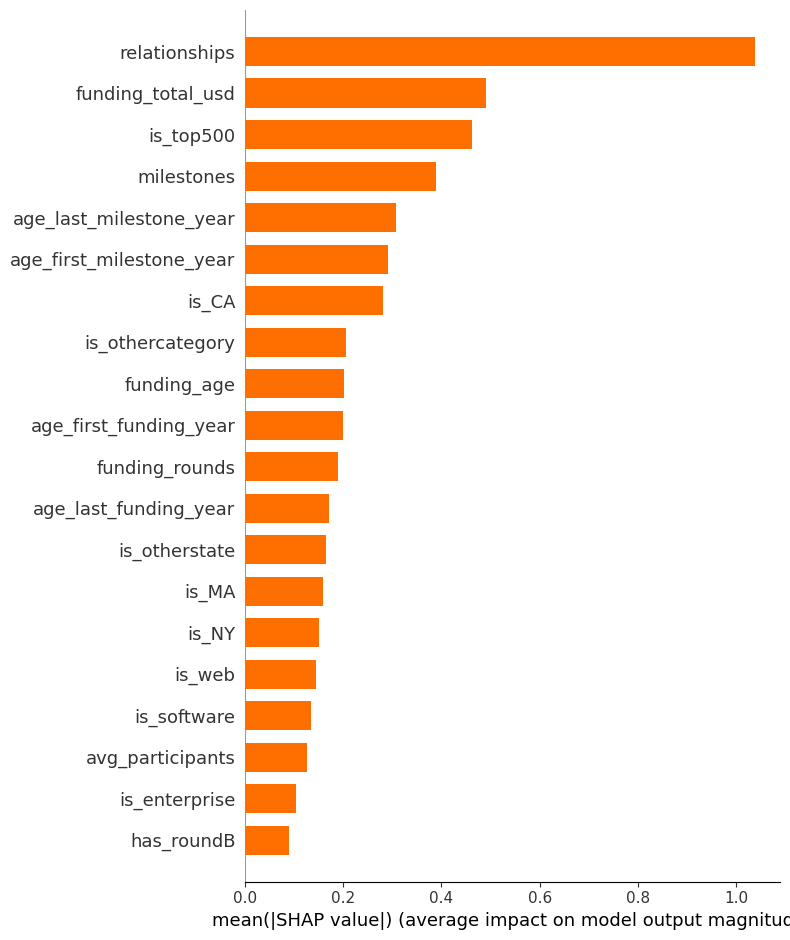

In [ ]:
# create SHAP summary plot with the rest of train data
shap.summary_plot(rf_shap_values, X_resampled[100:], plot_type='bar', color = '#ff6f00')

In [ ]:
# define Random Forest explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_resampled.values,
    feature_names = X_resampled.columns.tolist(),
    class_names = ['closed', 'acquired'],
    discretize_continuous = True,
    verbose = True
)

In [ ]:
company1 = X_train.iloc[0]
company1

,351
age_first_funding_year,1.616000e-01
age_last_funding_year,2.178100e+00
age_first_milestone_year,1.509600e+00
age_last_milestone_year,2.178100e+00
relationships,3.000000e+00
funding_rounds,4.000000e+00
funding_total_usd,3.350000e+06
milestones,2.000000e+00
is_CA,0.000000e+00
is_NY,0.000000e+00


In [ ]:
# explain Random Forest prediction for company 1
lime_explainer.explain_instance(
    data_row=company1,
    predict_fn=best_model.predict_proba,
    num_features=len(company1)  # Mengatur jumlah fitur ke jumlah total fitur dalam dataset
).show_in_notebook(show_table=True)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Intercept 1.861590766680984
Prediction_local [0.2590853]
Right: 0.9996614562620616
